## Edge Detection & Image Gradients
Edge detection is an image-processing technique, which is used to identify the boundaries (edges) of objects, or regions within an image. Edges are among the most important features associated with images. We come to know of the underlying structure of an image through its edges. Computer vision processing pipelines therefore extensively use edge detection in applications.

### Sobel Edge Detection

Sobel Edge Detection is one of the most widely used algorithms for edge detection. The Sobel Operator detects edges that are marked by sudden changes in pixel intensity, as shown in the figure below.

![foo](https://learnopencv.com/wp-content/uploads/2021/06/pixel_intensity.png)

These are the kernels used for Sobel Edge Detection:

 \begin{equation*} \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} \end{equation*}

X-Direction Kernel

\begin{equation*} \begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} \end{equation*}

Y-Direction Kernel

When these kernels are convolved with the original image, you get a ‘Sobel edge image’. 

    If we use only the Vertical Kernel, the convolution yields a Sobel image, with edges enhanced in the X-direction
    Using the Horizontal Kernel yields a Sobel image, with edges enhanced in the Y-direction. 

Let G_x and G_y represent the intensity gradient in the x and y directions respectively. If A and B denote the X and Y kernels defined above:

 \begin{equation*} G_x = A * I \end{equation*}

  \begin{equation*} G_y = B * I \end{equation*}

where * denotes the convolution operator, and I represents the input image. 

The final approximation of  the gradient magnitude, G can be computed as:

  \begin{equation*} G = \sqrt{G_x^2 + G_y^2} \end{equation*}

And the orientation of the gradient can then be approximated as:

  \begin{equation*} \Theta = arctan(G_y / G_x) \end{equation*}

In the code example below, we use the Sobel()

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

(512, 512, 3)


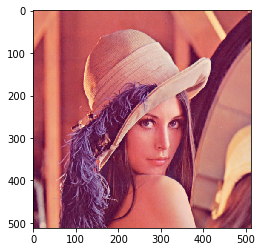

In [2]:
import cv2
import numpy as np

image = cv2.imread('../images/Lena.jpg')

print (image.shape)

# Show image
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)

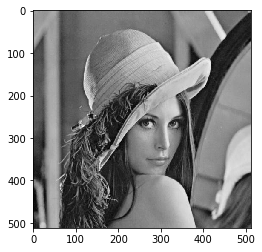

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

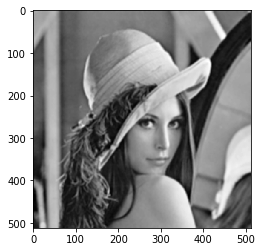

In [4]:
kernel_blur = np.ones((5,5),np.float32)/25

# applying different kernels to the input image
blur_image = cv2.filter2D(gray_image,-1,kernel_blur)
plt.imshow(blur_image, cmap='gray')

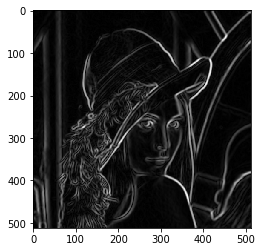

In [5]:
# Extract Sobel Edges
sobel_x = cv2.Sobel(blur_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(blur_image, cv2.CV_64F, 1, 0, ksize=5)
magnitude = np.sqrt(sobel_x*sobel_x+sobel_y*sobel_y)

plt.imshow(magnitude, cmap='gray')

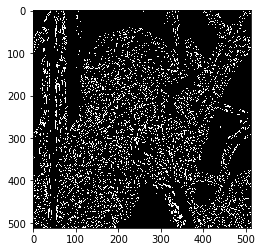

In [13]:
t,img_edge = cv2.threshold(np.uint8(magnitude), 210, 255, cv2.THRESH_BINARY)
plt.imshow(img_edge, cmap='gray')

## Canny 

In [8]:
edges = cv2.Canny(blur_image, threshold1=100, threshold2=125) 

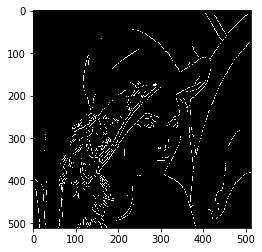

In [9]:
plt.imshow(edges, cmap='gray')